In [1]:
#Import required modules and styles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Read in required data and drop first column
df = pd.read_csv('../Project1_exploration/output_data/Top_497.csv')
restaurants = df.drop('Unnamed: 0', axis=1)
restaurants.head(3)

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,590,224,"French, European"
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1234,329,Japanese


In [3]:
#Filter data by average cost for two less than or equal to $200, reset index and produce CSV file
filt_200 = restaurants['Average Cost for two'] <=200
restaurants_200 = restaurants[filt_200]
restaurants_200 = restaurants_200.reset_index(drop=True)
restaurants_200.to_csv('filt_200.csv')
restaurants_200.head(3)

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,590,224,"French, European"
1,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
2,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [4]:
#Define plot variables
x1 = df.iloc[0:93, 9]
y1 = df.iloc[0:93, 10]
x2 = df.iloc[94:185, 9]
y2 = df.iloc[94:185, 10]
x3 = df.iloc[186:285, 9]
y3 = df.iloc[186:285, 10]
x4 = df.iloc[286:381, 9]
y4 = df.iloc[286:381, 10]
x5 = df.iloc[382:477, 9]
y5 = df.iloc[382:477, 10]

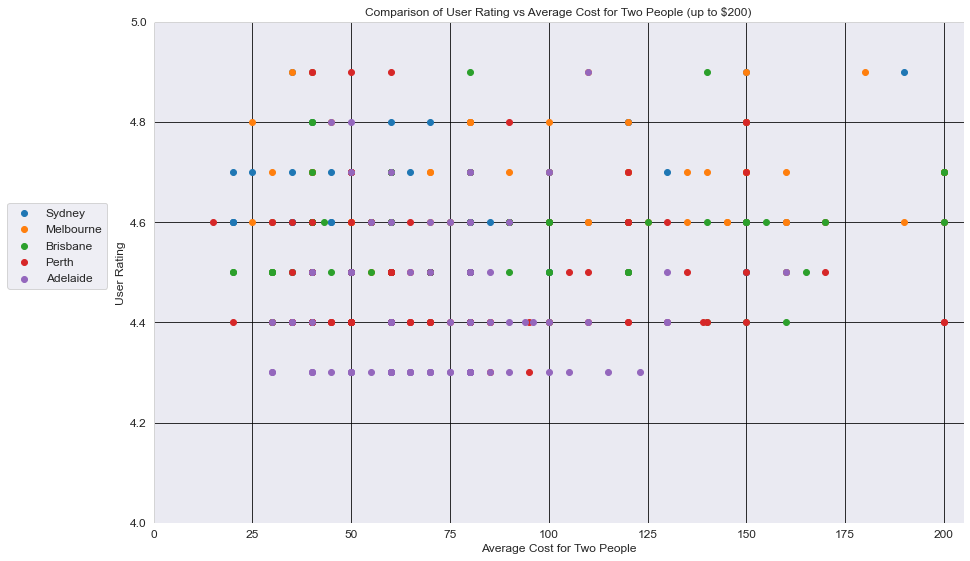

In [7]:
#Specify plot to be a scatter plot and add variables
plt.scatter(x1,y1, label='Sydney')
plt.scatter(x2,y2, label='Melbourne')
plt.scatter(x3,y3, label='Brisbane')
plt.scatter(x4,y4, label='Perth')
plt.scatter(x5,y5, label='Adelaide')

#Set plot x and y axis limits
plt.axis([0, 205, 4.0, 5.0])

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(15, 12)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=small)     
plt.rc('axes', titlesize=small)     
plt.rc('axes', labelsize=small) 
plt.rc('xtick', labelsize=small)   
plt.rc('ytick', labelsize=small)   
plt.rc('legend', fontsize=small)  
plt.rc('figure', titlesize=large)

#Add legend and set graph and legend position
#plt.legend(loc='best')
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.legend(bbox_to_anchor=(-0.05, 0.65), loc='upper right')

#Add title, axis labels and gridlines
plt.title('Comparison of User Rating vs Average Cost for Two People (up to $200)')
plt.xlabel('Average Cost for Two People')
plt.ylabel('User Rating')
plt.grid(which='major', linestyle='-', color='black')

#Save plot
plt.savefig("scatter_200.png")